In [117]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

colors = np.arange(0, 256)
figure_size = (32, 4)
histogram_bins_edges = range(0, 257)

rgb = cv.imread('resources/practice-2/rgb.png')
gray = cv.imread('resources/practice-2/gray.jpg', cv.IMREAD_GRAYSCALE)
gray_equalized = cv.imread('resources/practice-2/gray_equalized.jpg', cv.IMREAD_GRAYSCALE)
noisy_cube = cv.imread('resources/practice-2/noisy_cube.jpg')
photo = cv.imread('resources/practice-2/photo.jpg')
median = cv.imread('resources/practice-2/median.jpeg', cv.IMREAD_GRAYSCALE)

In [85]:
# 1. Преобразувайте изображението rgb.png от RGB към HSV. Филтрирайте по зададени критерии HSV стойностите на пикселите. Преобразувайте филтрирания резултат обратно към RGB.

# The HSV image is used to get the correct mask
hsv = cv.cvtColor(rgb, cv.COLOR_BGR2HSV)

# To get the HSV values of red, I used the color map in https://cvexplained.wordpress.com/2020/04/28/color-detection-hsv/
# Lower boundary RED color range values; Hue (0 - 10)
lower_mask = cv.inRange(hsv, np.array([0, 100, 20]), np.array([10, 255, 255]))
# Upper boundary RED color range values; Hue (160 - 180)
upper_mask = cv.inRange(hsv, np.array([160,100,20]), np.array([179,255,255]))
mask = lower_mask + upper_mask;
 
rgb_filtered = cv.bitwise_and(rgb, rgb, mask=mask)

cv.imshow('original', rgb)
cv.imshow('lower_mask', lower_mask)
cv.imshow('upper_mask', upper_mask)
cv.imshow('mask', mask)
cv.imshow('filtered image', rgb_filtered)

# Waits to press any key
cv.waitKey(0)
# This is needed for Jupyter - otherwise it crashes
cv.destroyAllWindows()

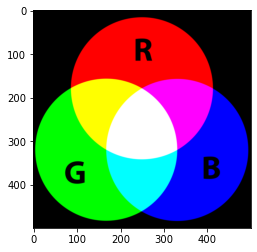

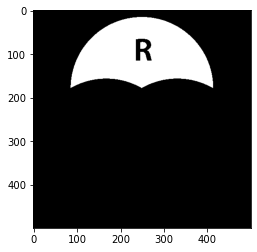

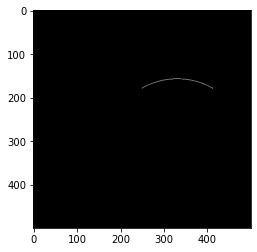

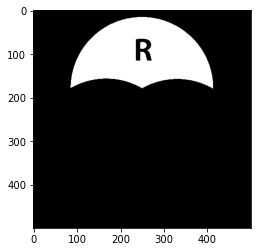

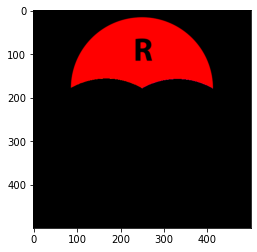

In [86]:
# Display using plt

plt.figure()
plt.imshow(cv.cvtColor(rgb, cv.COLOR_BGR2RGB))

plt.figure()
plt.imshow(lower_mask, 'gray', vmin=0, vmax=255)

plt.figure()
plt.imshow(upper_mask, 'gray', vmin=0, vmax=255)

plt.figure()
plt.imshow(mask, 'gray', vmin=0, vmax=255)

plt.figure()
plt.imshow(cv.cvtColor(rgb_filtered, cv.COLOR_BGR2RGB))

In [87]:
# With color picker for the filter

def onChangeCallback(x):
    pass

# Setup windows positions
cv.namedWindow('input')
cv.moveWindow('input', 0, 20)

cv.namedWindow('trackbars')
cv.moveWindow('trackbars', 1000, 20)

cv.namedWindow('mask')
cv.moveWindow('mask', 500, 20)

cv.namedWindow('output')
cv.moveWindow('output', 500, 20)

# Setup trackbars
# In OpenCV H: [0, 180], S: [0, 255], V: [0, 255]
cv.createTrackbar('min H', 'trackbars', 0, 180, onChangeCallback)
cv.createTrackbar('min S', 'trackbars', 0, 255, onChangeCallback)
cv.createTrackbar('min V', 'trackbars', 0, 255, onChangeCallback)
cv.createTrackbar('max H', 'trackbars', 0, 180, onChangeCallback)
cv.createTrackbar('max S', 'trackbars', 0, 255, onChangeCallback)
cv.createTrackbar('max V', 'trackbars', 0, 255, onChangeCallback)

# Event loop for GUI
while True:
    hMin = cv.getTrackbarPos('min H', 'trackbars')
    sMin = cv.getTrackbarPos('min S', 'trackbars')
    vMin = cv.getTrackbarPos('min V', 'trackbars')
    hMax = cv.getTrackbarPos('max H', 'trackbars')
    sMax = cv.getTrackbarPos('max S', 'trackbars')
    vMax = cv.getTrackbarPos('max V', 'trackbars')

    # Threshold the HSV image to get only the specified colors
    mask = cv.inRange(hsv, np.array([hMin, sMin, vMin]), np.array([hMax, sMax, vMax]))

    # Bitwise-AND mask and original image
    rgb_filtered = cv.bitwise_and(rgb, rgb, mask = mask)

    cv.imshow('input', rgb)
    cv.imshow('mask', mask)
    cv.imshow('output', rgb_filtered)

    # Close on escape key
    key = cv.waitKey(1) & 0xFF
    if key == 27:
        break

cv.destroyAllWindows()

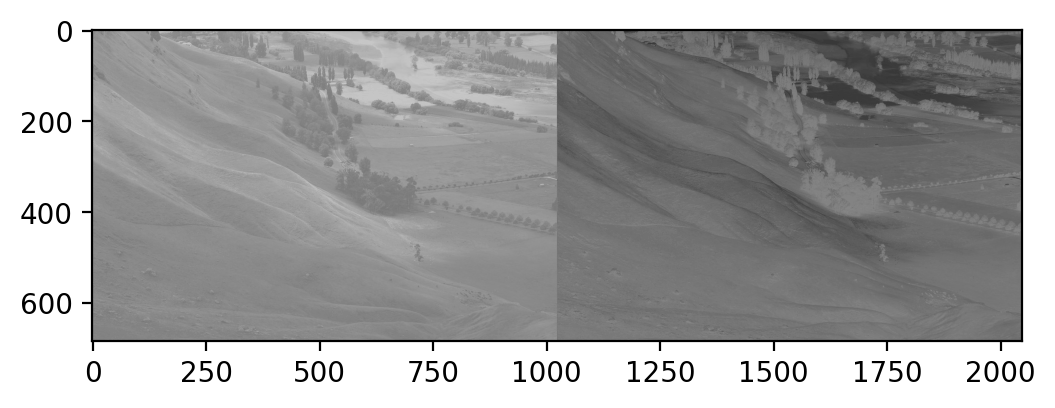

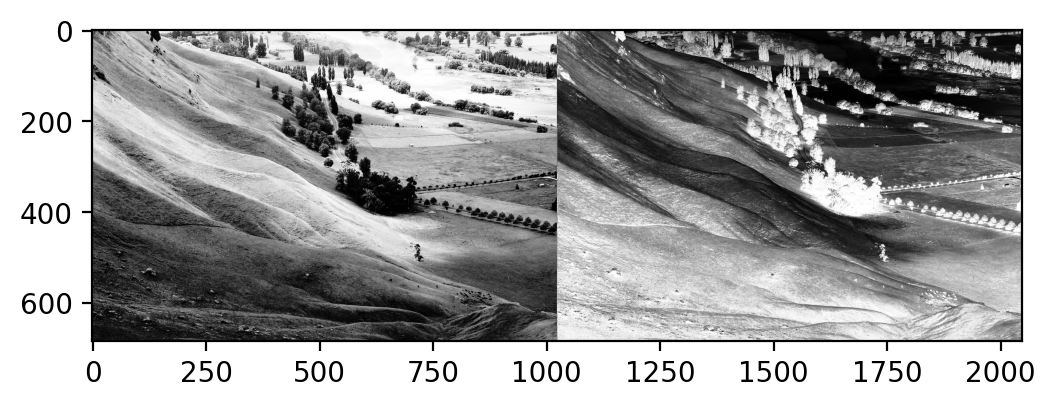

In [88]:
# 2. Приложете пространствената операция негатив върху полутоново изображение. 
# Използвайте като входно изображението gray.jpg. 
# Приложете същата операция и върху резултата от изравняването на хистограмата на gray.jpg.

gray_negative = 255 - gray

# Scales the images using the resolution. Default is 100, to make image bigger increase
plt.figure(dpi=200)
# Displays the images side by side
plt.imshow(np.concatenate((gray, gray_negative), axis=1), 'gray', vmin=0, vmax=255)

# OpenCV way to do a negative
gray_equalized_negative = cv.bitwise_not(gray_equalized)

plt.figure(dpi=200)
plt.imshow(np.concatenate((gray_equalized, gray_equalized_negative), axis=1), 'gray', vmin=0, vmax=255)

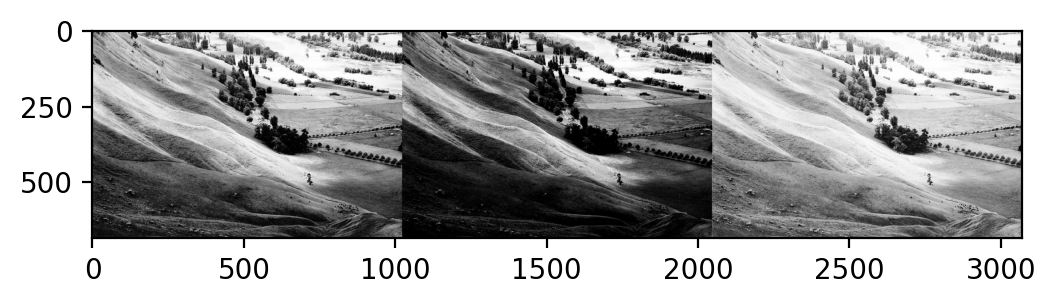

In [89]:
# 3. Приложете гама корекция върху gray.jpg с изравнена хистограма.

gray_equalized = cv.imread('resources/practice-2/gray_equalized.jpg', cv.IMREAD_GRAYSCALE)

# Apply gamma correction by using numpy matrix operations
# This is as desribed here https://en.wikipedia.org/wiki/Gamma_correction (gamma > 1 => darker immage)
# 1. We need to scale the input from [0, 255] to [0, 1] (gray_equalized / 255.0)
# 2. Raise to the power of gamma ((gray_equalized / 255.0) ** 2)
# 3. Convert back to the original color space (255.0 * ((gray_equalized / 255.0) ** 2))
# 4. Cast result to 8-bit unsigned int
gamma_2 = (255.0 * ((gray_equalized / 255.0) ** 2)).astype(np.uint8)
gamma_0_5 = (255.0 * ((gray_equalized / 255.0) ** 0.5)).astype(np.uint8)

plt.figure(dpi=200)
plt.imshow(np.concatenate((gray_equalized, gamma_2, gamma_0_5), axis=1), 'gray', vmin=0, vmax=255)

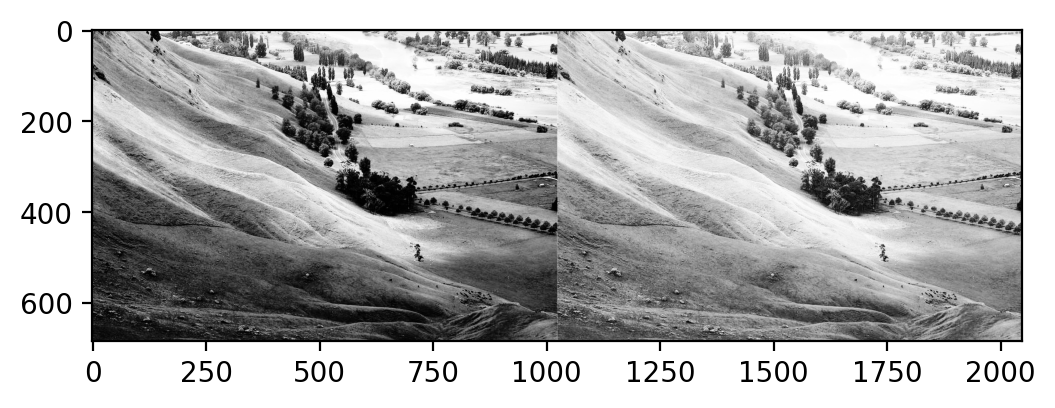

In [90]:
# Apply gamma correction using OpenCV

# In some articles the formula for gamma corection is using the reciprocal of gamma https://learnopengl.com/Advanced-Lighting/Gamma-Correction
table = np.array([255 * ((i / 255.0) ** (1 / 2.2)) for i in range(0, 256)]).astype(np.uint8)
# Look-up table transformation of the image
gamma_corrected = cv.LUT(gray_equalized, table)

plt.figure(dpi=200)
plt.imshow(np.concatenate((gray_equalized, gamma_corrected), axis=1), 'gray', vmin=0, vmax=255)

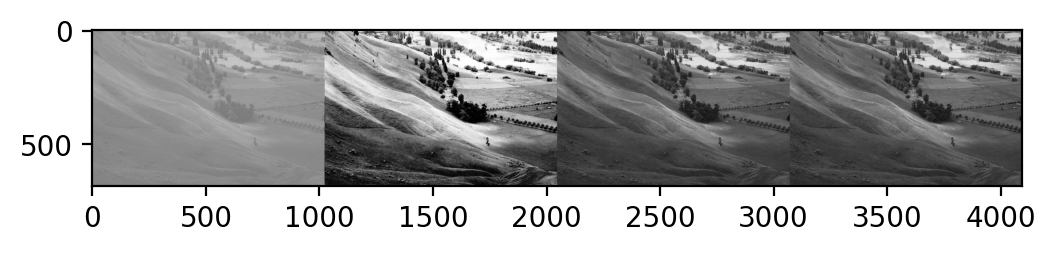

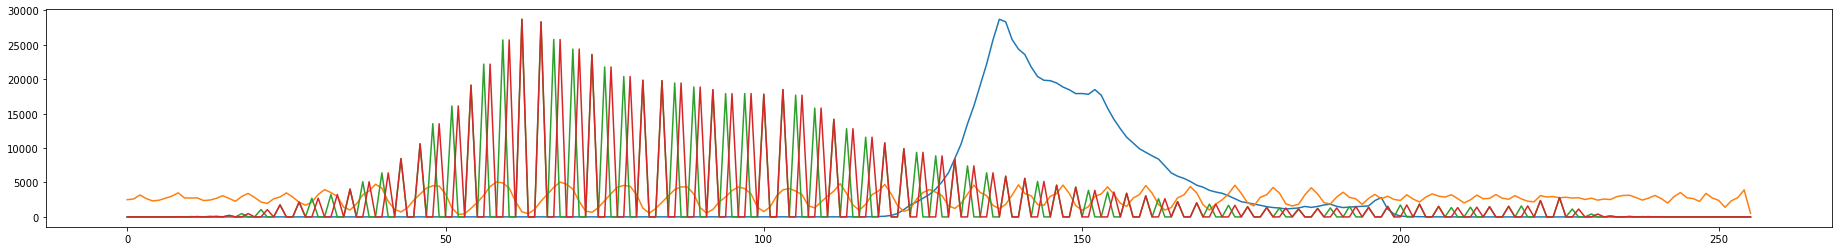

In [91]:
# 4. Приложете операцията Contrast Stretching върху gray.jpg. 
# Сравнете резултата с този от изравняването на хистограмата. 
# Сравнете хистограмата на gray.jpg с тази след прилагането на Contrast Stretching операцията

# Apply contrast stretching by using numpy matrix operations
# Note: do not forget to cast result to 8-bit unsigned int
a = 0   # min intensity
b = 255 # max intensity
c = np.min(gray) # lower strech bound
d = np.max(gray) # upper strech bound
gray_contrast_stretched = (gray.astype(np.double) - c) * (b - a) / (d - c) + a
gray_contrast_stretched[gray_contrast_stretched < a] = a
gray_contrast_stretched[gray_contrast_stretched > b] = b
gray_contrast_stretched = gray_contrast_stretched.astype(np.uint8)

# Using OpenCV to contrast stretch an image
gray_contrast_stretched_opencv = cv.normalize(gray, dst=None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)

plt.figure(dpi = 200)
plt.imshow(np.concatenate((gray, gray_equalized, gray_contrast_stretched, gray_contrast_stretched_opencv), axis=1), 'gray', vmin=0, vmax=255)

# Using plt.hist crashes for some reason, maybe performance
histogram, _ = np.histogram(gray, bins=histogram_bins_edges)
histogram_equalized, _ = np.histogram(gray_equalized, bins=histogram_bins_edges)
histogram_contrast_stretched_opencv, _ = np.histogram(gray_contrast_stretched_opencv, bins=histogram_bins_edges)
histogram_contrast_stretched, _ = np.histogram(gray_contrast_stretched, bins=histogram_bins_edges)

plt.figure(figsize=figure_size)
plt.plot(histogram)
plt.plot(histogram_equalized)
plt.plot(histogram_contrast_stretched)
plt.plot(histogram_contrast_stretched_opencv)



In [92]:
# 5. Генерирайте матрица с размерност 5x5 със случайни цели числа между 0 и 10. Приложете конволюция върху нея с плъзгащ прозорец 3х3.

image_width = 5
image_height = 5
image = np.random.randint(0, 11, size=(image_height, image_width), dtype=np.uint8)

kernel_width = 3
kernel_height = 3
kernel = np.array([
    [0, 0, 0],
    [0, 2, 1],
    [0, 0, 0]], dtype=np.uint8)
kernel_offset_y = kernel_height // 2
kernel_offset_x = kernel_width // 2

convoluted_image = np.zeros(shape=(5, 5))

for img_y, img_row in enumerate(image):
    for img_x, img_pixel in enumerate(img_row):    
        convoluted_image_pixel = 0
        for kernel_y, kernel_row in enumerate(kernel):
            neighbour_pixel_y = img_y - kernel_offset_y  + kernel_y
            if not neighbour_pixel_y in range(0, image_width):
                continue
                
            for kernel_x, kernel_pixel in enumerate(kernel_row):
                neighbour_pixel_x = img_x - kernel_offset_x  + kernel_x
                if not neighbour_pixel_x in range(0, image_height):
                    continue
                
                convoluted_image_pixel += image[neighbour_pixel_y][neighbour_pixel_x] * kernel[kernel_y][kernel_x]
                
        convoluted_image[img_y][img_x] = convoluted_image_pixel
        
# Convolution using OpenCV
convoluted_image_opencv = cv.filter2D(src=image, ddepth=-1, kernel=kernel, borderType=cv.BORDER_ISOLATED)
        
print(f'image: {image}')
print(f'kernel: {kernel}')
print(f'convoluted image: {convoluted_image}')
print(f'convoluted image using OpenCV: {convoluted_image_opencv}')


image: [[ 0  3  2  9  7]
 [ 9  1 10 10  4]
 [ 9 10  7  7  4]
 [ 5  5  0  6  7]
 [ 6  4  7  7  4]]
kernel: [[0 0 0]
 [0 2 1]
 [0 0 0]]
convoluted image: [[ 3.  8. 13. 25. 14.]
 [19. 12. 30. 24.  8.]
 [28. 27. 21. 18.  8.]
 [15. 10.  6. 19. 14.]
 [16. 15. 21. 18.  8.]]
convoluted image using OpenCV: [[ 3  8 13 25 14]
 [19 12 30 24  8]
 [28 27 21 18  8]
 [15 10  6 19 14]
 [16 15 21 18  8]]


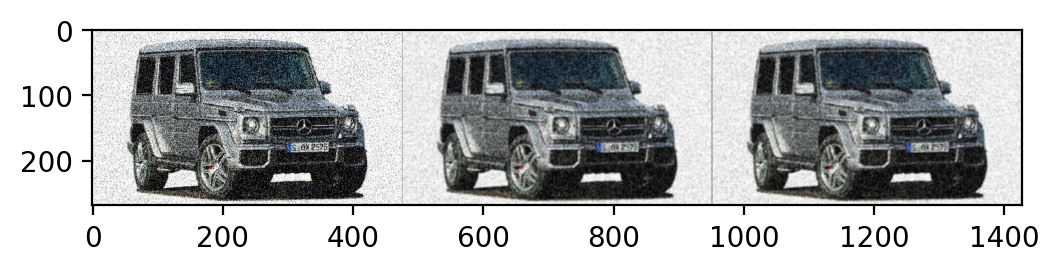

In [93]:
# 6.Приложете заглаждащ линеен филтър с размерност 3х3 и 5х5 върху noisy_cube.jpg. Сравнете получените резултати.

kernel_3 = np.ones(shape=(3, 3))
kernel_3 = kernel_3 / np.sum(kernel_3)
filtered_3 = cv.filter2D(src=noisy_cube, ddepth=-1, kernel=kernel_3, borderType=cv.BORDER_ISOLATED)

kernel_5 = np.ones(shape=(5, 5))
kernel_5 = kernel_5 / np.sum(kernel_5)
filtered_5 = cv.filter2D(src=noisy_cube, ddepth=-1, kernel=kernel_3, borderType=cv.BORDER_ISOLATED)

plt.figure(dpi=200)
plt.imshow(np.concatenate((cv.cvtColor(noisy_cube, cv.COLOR_BGR2RGB), cv.cvtColor(filtered_3, cv.COLOR_BGR2RGB), cv.cvtColor(filtered_5, cv.COLOR_BGR2RGB)), axis=1))

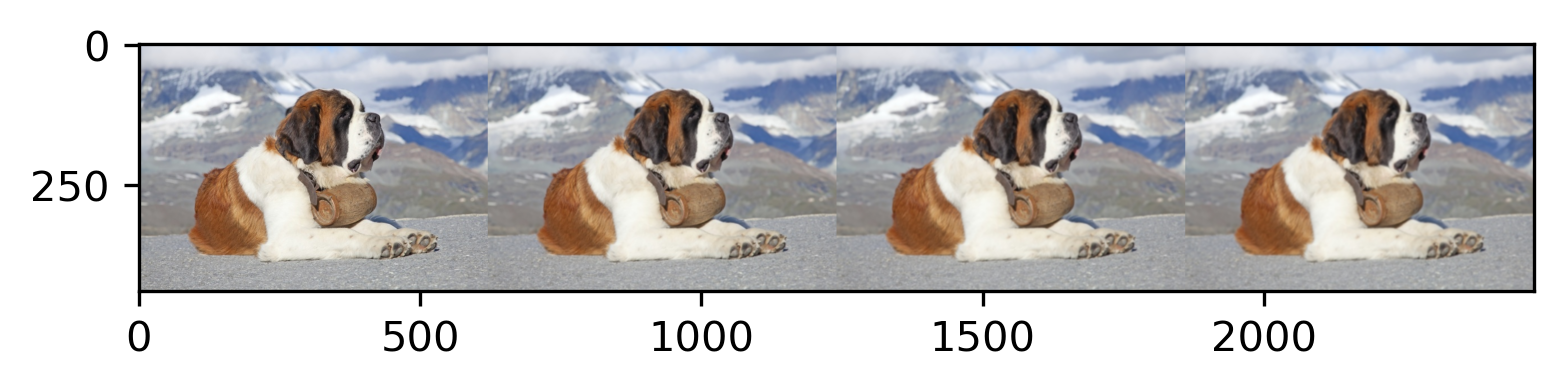

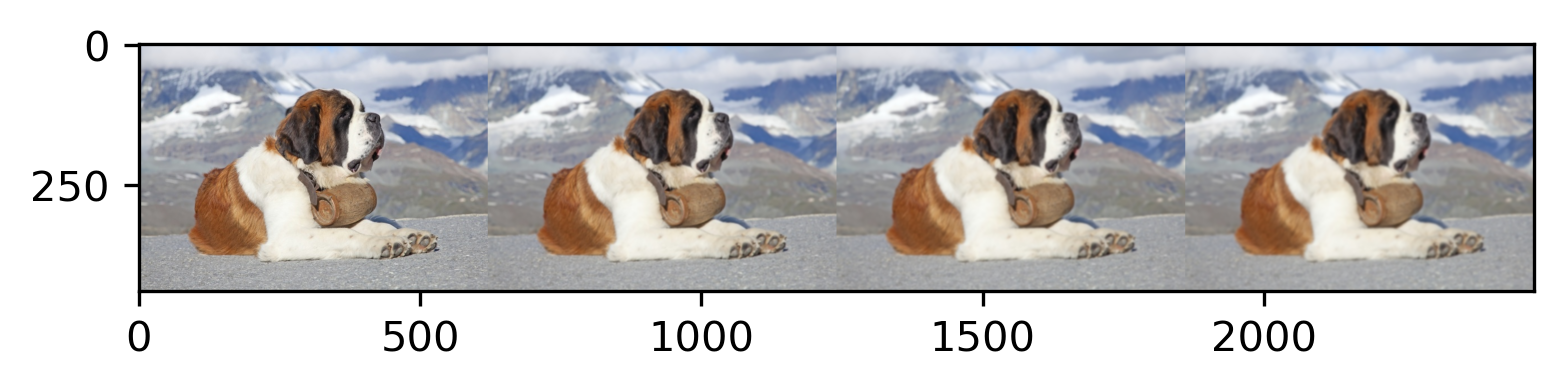

In [103]:
# 7. Приложете гаусов филтър с плъзгащ прозорец 3х3 и 5х5 върху photo.jpg. Приложете го няколко пъти последователно. Сравнете получените резултати.

# Gaussian blur is convolution with a matrix containing the values of a Gaussian function

gaussian_blur_3 = cv.GaussianBlur(photo, ksize=(3, 3), sigmaX=0)
gaussian_blur_3_3 = cv.GaussianBlur(gaussian_blur_3, ksize=(3, 3), sigmaX=0)
gaussian_blur_3_3_3 = cv.GaussianBlur(gaussian_blur_3_3, ksize=(3, 3), sigmaX=0)

gaussian_blur_5 = cv.GaussianBlur(photo, ksize=(5, 5), sigmaX=0)
gaussian_blur_5_5 = cv.GaussianBlur(gaussian_blur_5, ksize=(5, 5), sigmaX=0)
gaussian_blur_5_5_5 = cv.GaussianBlur(gaussian_blur_5_5, ksize=(5, 5), sigmaX=0)

plt.figure(dpi=300)
plt.imshow(np.concatenate((cv.cvtColor(photo, cv.COLOR_BGR2RGB), cv.cvtColor(gaussian_blur_3, cv.COLOR_BGR2RGB), cv.cvtColor(gaussian_blur_3_3, cv.COLOR_BGR2RGB), cv.cvtColor(gaussian_blur_3_3_3, cv.COLOR_BGR2RGB)), axis=1))
plt.figure(dpi=300)
plt.imshow(np.concatenate((cv.cvtColor(photo, cv.COLOR_BGR2RGB), cv.cvtColor(gaussian_blur_5, cv.COLOR_BGR2RGB), cv.cvtColor(gaussian_blur_5_5, cv.COLOR_BGR2RGB), cv.cvtColor(gaussian_blur_5_5_5, cv.COLOR_BGR2RGB)), axis=1))

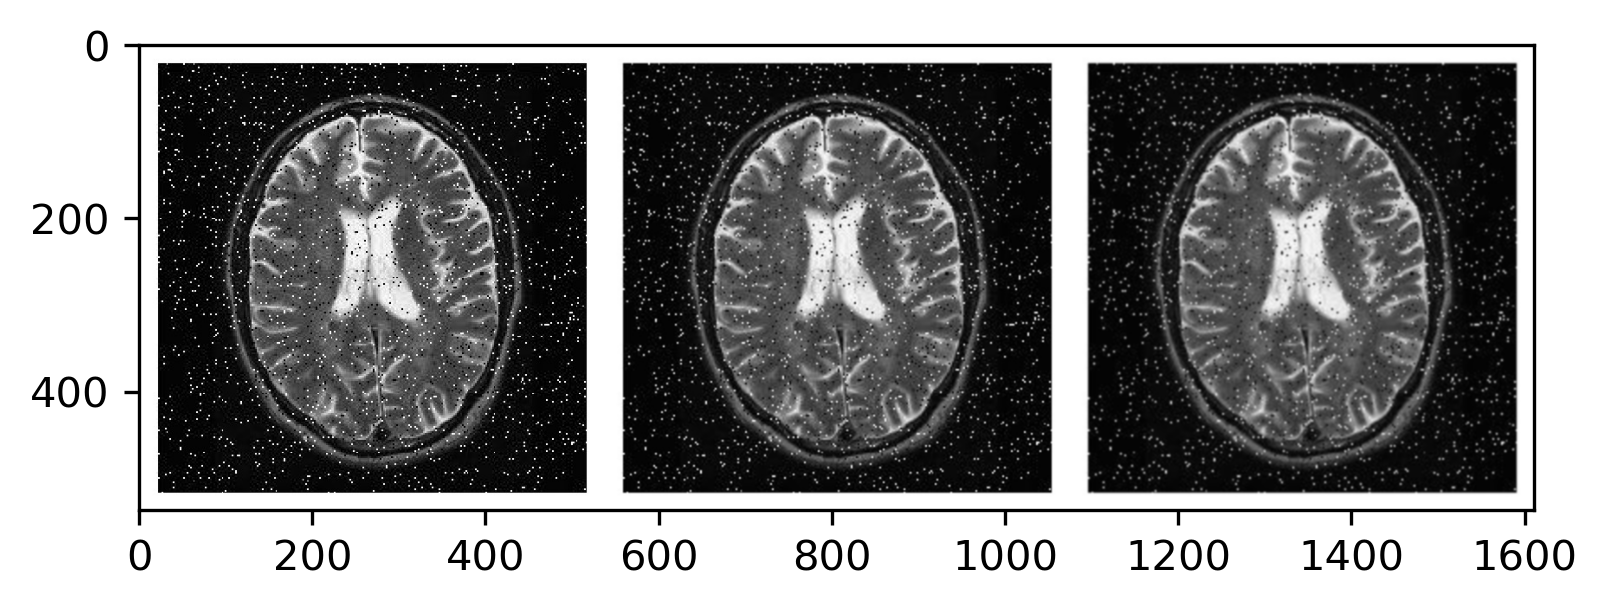

In [118]:
# 8. Приложете 5x5 гаусов и 5x5 медианен филтър върху median.jpeg. Сравнете получените резултати

gaussian_blur_3 = cv.GaussianBlur(median, ksize=(3, 3), sigmaX=0)
gaussian_blur_5 = cv.GaussianBlur(median, ksize=(5, 5), sigmaX=0)

plt.figure(dpi=300)
plt.imshow(np.concatenate((cv.cvtColor(median, cv.COLOR_BGR2RGB), cv.cvtColor(gaussian_blur_3, cv.COLOR_BGR2RGB), cv.cvtColor(gaussian_blur_5, cv.COLOR_BGR2RGB)), axis=1))